In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


note in this data set yes=2 & no=1

In [ ]:
df.shape

(309, 16)

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

33

In [ ]:
#Removing Duplicates
df=df.drop_duplicates()

In [ ]:
#Checking for null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.**

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [ ]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


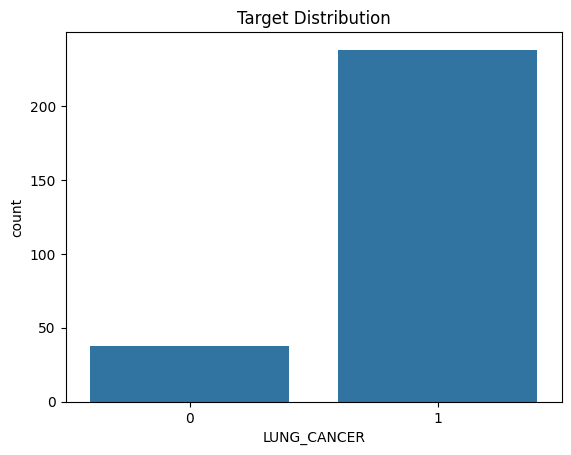

In [ ]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

##### ***That is, Target Distribution is imbalanced.***

In [ ]:
df['LUNG_CANCER'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 276, dtype: int64>

***We will handle this imbalance before applyig algorithm.***
**Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..**

In [ ]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

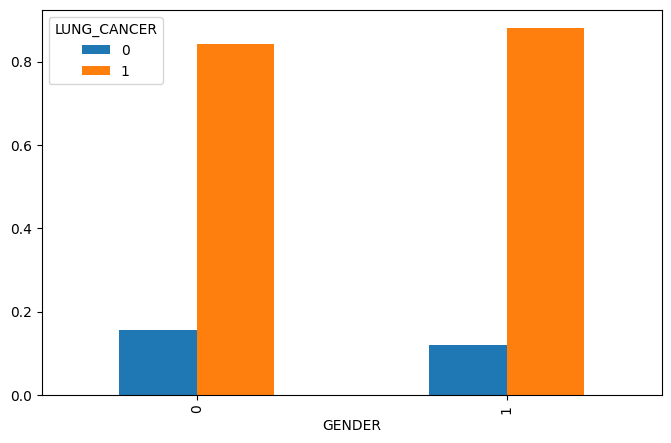

In [ ]:
plot('GENDER')

<Axes: xlabel='AGE'>

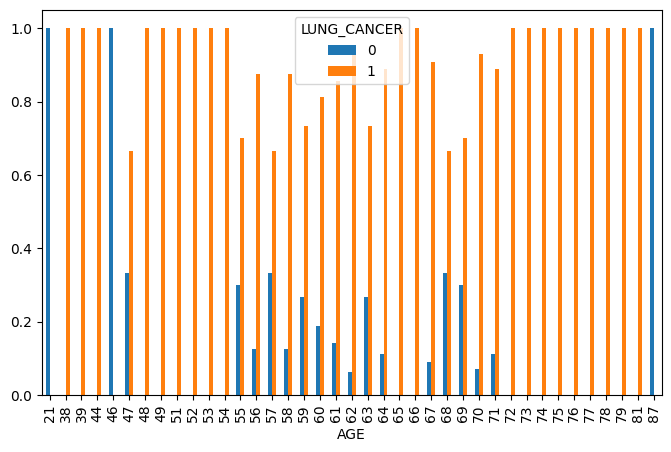

In [ ]:
plot('AGE')

<Axes: xlabel='SMOKING'>

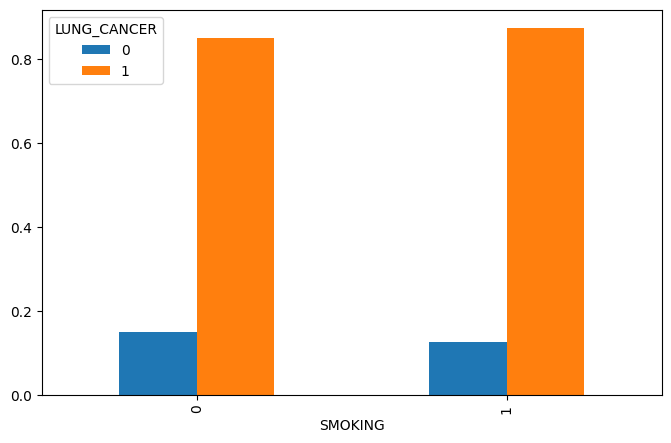

In [ ]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

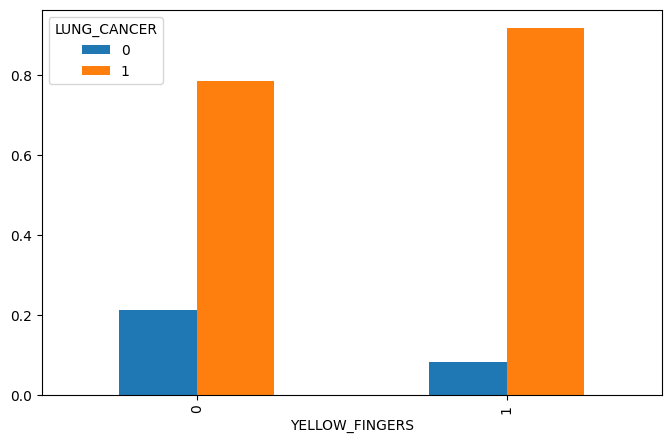

In [ ]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

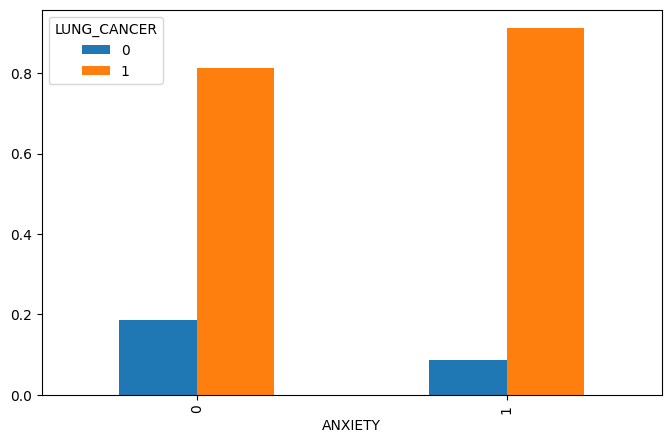

In [ ]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

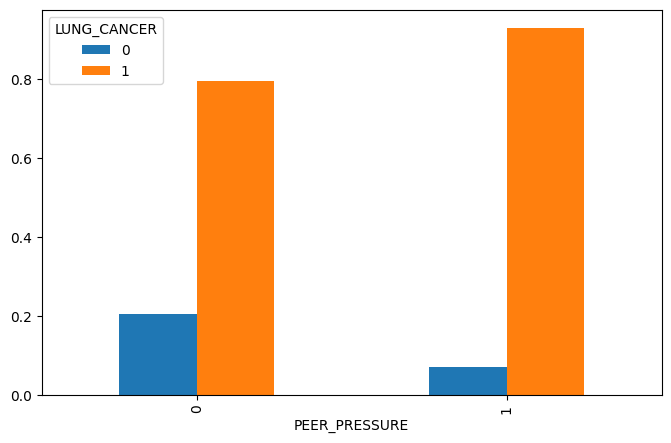

In [ ]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

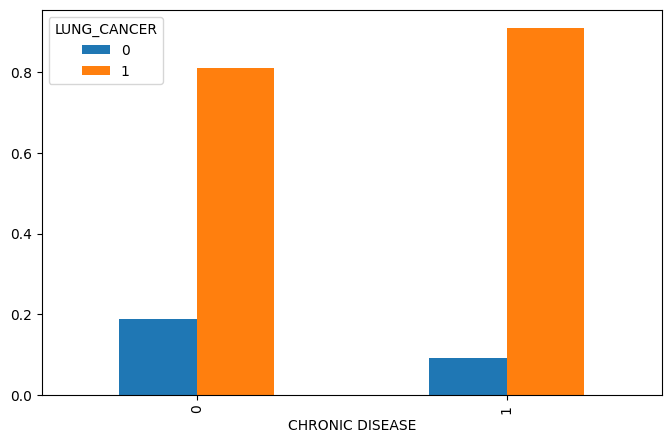

In [ ]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

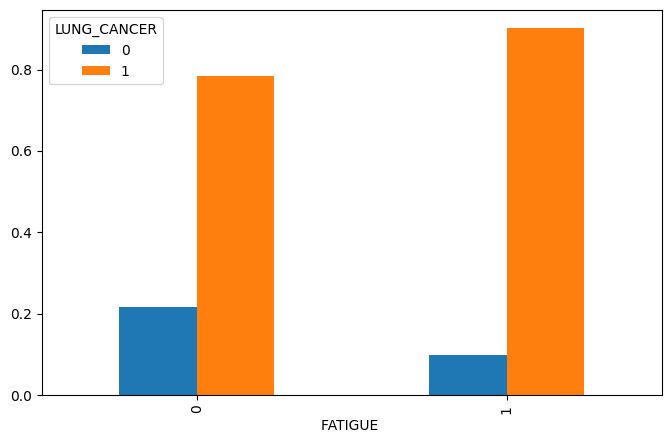

In [ ]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

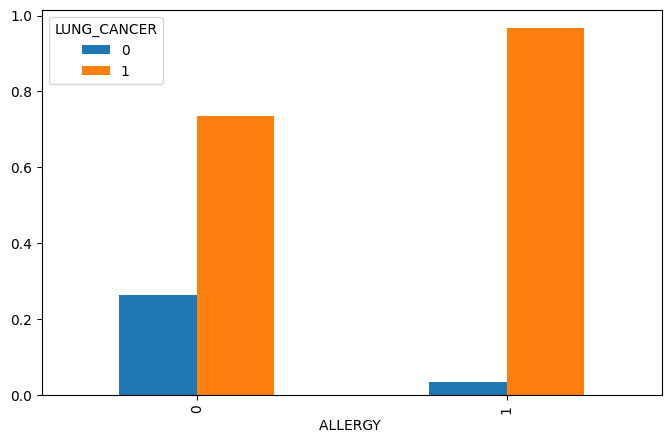

In [ ]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

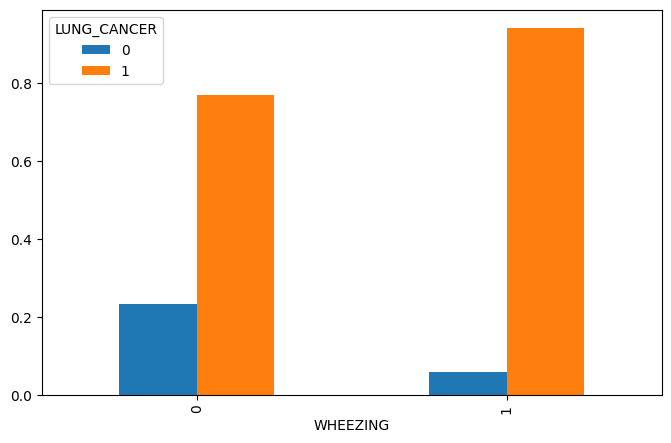

In [ ]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

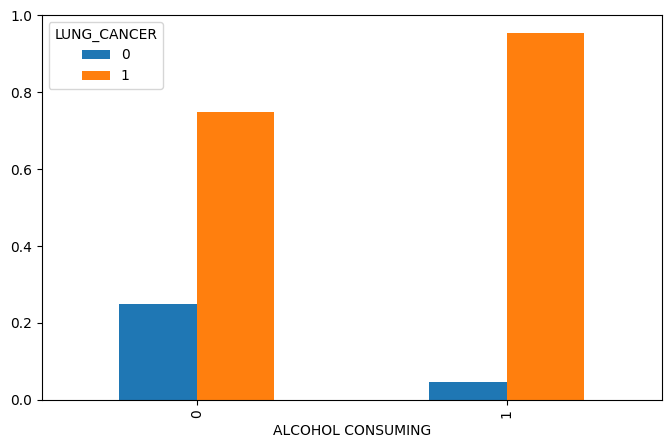

In [ ]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

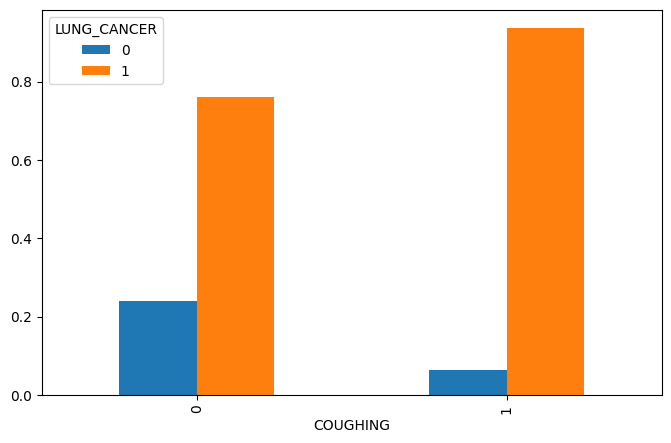

In [ ]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

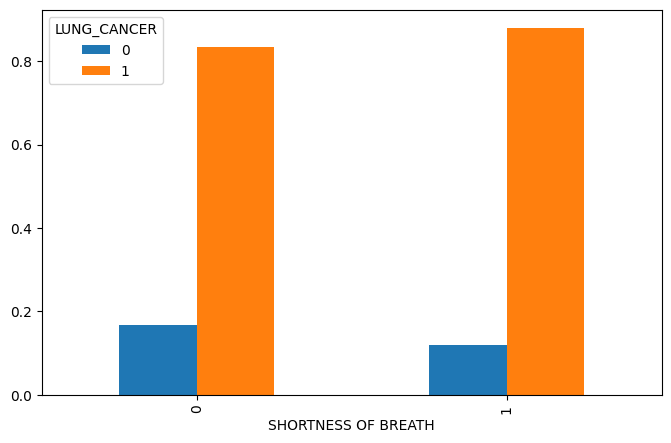

In [ ]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

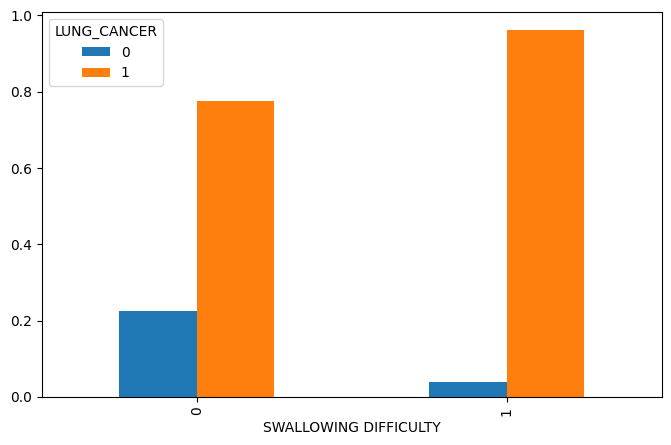

In [ ]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

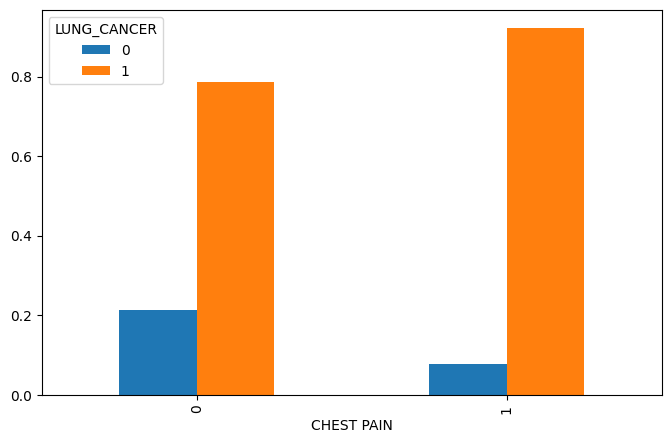

In [ ]:
plot('CHEST PAIN')

**From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.**

In [ ]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


**CORRELATION**

In [ ]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


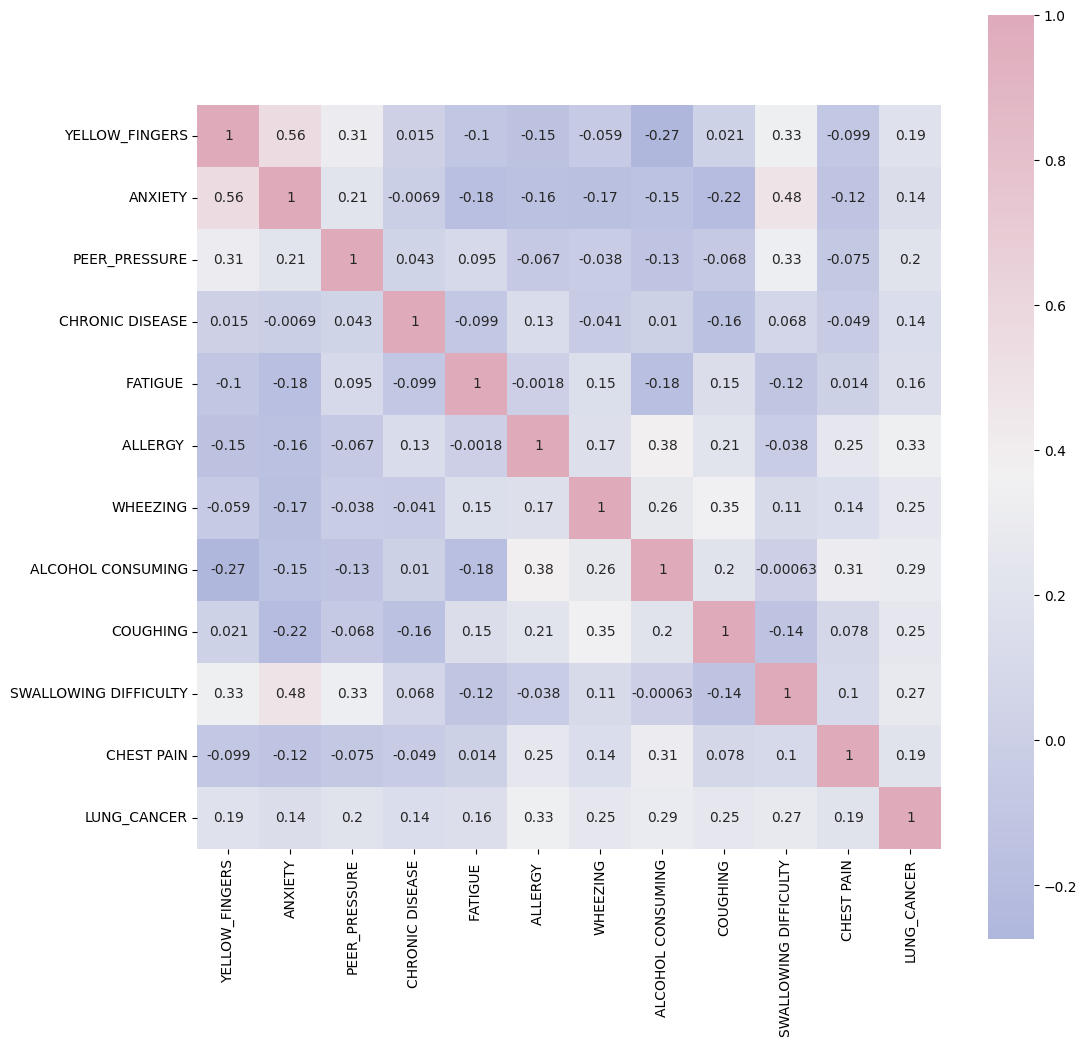

In [ ]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(12,12))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

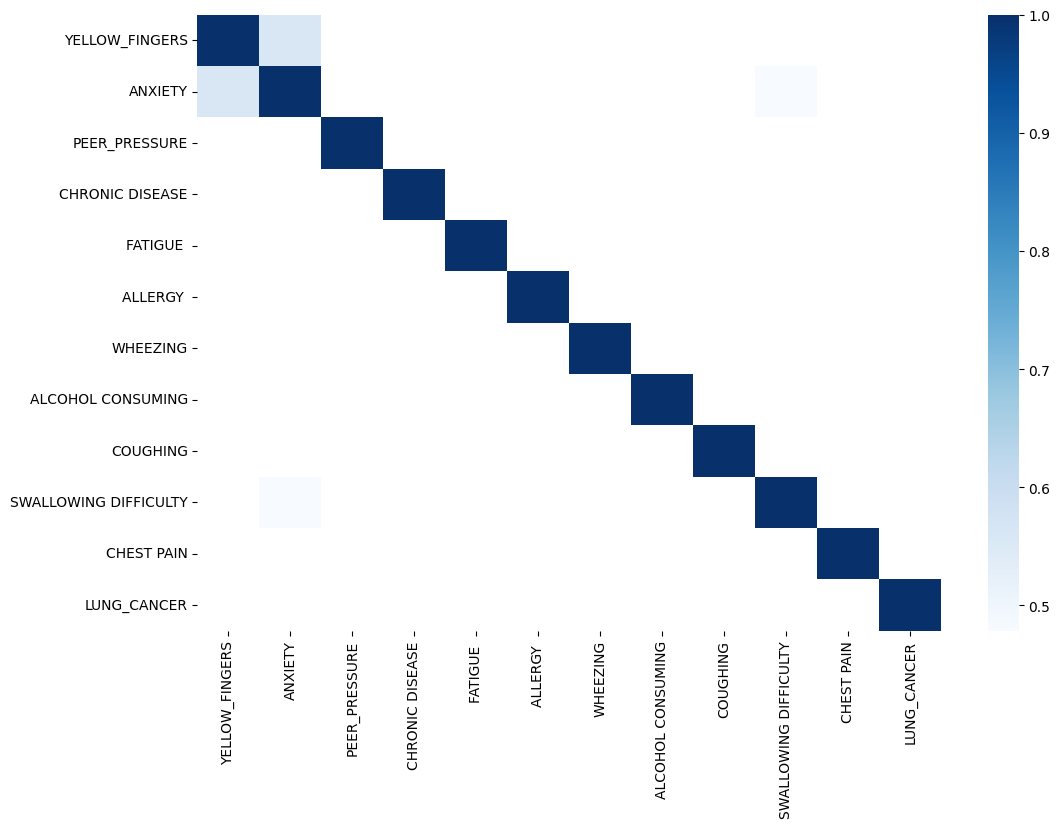

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# ***Feature Engineering*** bold text
Feature Engineering is the process of creating new features using existing features.

***The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.***

In [ ]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

# ***Target Distribution Imbalance Handling*** **bold text**

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [ ]:
len(X)

477

# **Logistic Regression** **bold text**

In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.97        56

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



**This model is almost 97% accurate.** **bold text**

# **Decision Tree** **bold text**

In [ ]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.96      0.91      0.94        56

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



**This model is 94% accurate.**

# **K Nearest Neighbor** **bold text**

In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        64
           1       1.00      0.91      0.95        56

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



**This model is 96% accurate.**

# **Gaussian Naive Bayes** **bold text**

In [ ]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.88      0.95      0.91        56

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



**This model is 92% accurate.**

# **Support Vector Machine** **bold text**

In [ ]:
#Fitting SVM to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**This model is 98% accurate.**

# **Random Forest** **bold text**

In [ ]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**This model is also 98% accurate.**

# **XGBoost** **bold text**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.96      0.98      0.97        56

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



**This model is also 97% accurate.**

# **Gradient Boosting** **bold text**

In [ ]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**This model is also 98% accurate.**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Data for all models based on your classification reports
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "KNN", "Gaussian Naive Bayes",
        "SVM", "Random Forest", "XGBoost", "Gradient Boosting"
    ],
    "Accuracy": [0.98, 0.97, 0.96, 0.93, 0.97, 0.98, 0.97, 0.98],
    "F1 Score": [0.98, 0.97, 0.96, 0.93, 0.97, 0.98, 0.97, 0.98],
    "Precision": [0.98, 0.97, 0.96, 0.93, 0.97, 0.98, 0.97, 0.98],
    "Recall": [0.98, 0.97, 0.96, 0.93, 0.97, 0.98, 0.97, 0.98]
}

# Creating DataFrame for easier plotting
df = pd.DataFrame(data)

# Create an empty figure
fig = go.Figure()

# Add a bar trace for each metric
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
for metric in metrics:
    fig.add_trace(go.Bar(
        x=df["Model"],
        y=df[metric],
        name=metric,
        text=df[metric],  # Display values on hover
        textposition='auto'  # Position text automatically
    ))

# Update layout for better readability
fig.update_layout(
    title="Performance Comparison of Eight Models",
    xaxis_title="Model",
    yaxis_title="Metric Value",
    barmode='group',  # Groups bars for each model
    yaxis=dict(range=[0, 1]),  # Sets y-axis range to 0-1 for easy comparison
    legend_title="Metrics"
)

# Show plot
fig.show()


From the above calculated accuracies, it is clear that the SVC, Random Forest, Multi-layer Perceptron and Gradient Boost models performed atmost level while the worst performed one is Multinomial Naive Bayes.
However, I'm interested in a more efficient way of evaluating these models. Let's go for the Cross Validation methods using both K-Fold and Stratified K-Fold

# **Cross Validation** **bold text**

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.

During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.

K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.

Typically, values of K between 5 and 10 are used for K-Fold cross validation, but the optimal value of K may vary depending on the size and complexity of the dataset, as well as the type of model being evaluated.

Here are some general guidelines that can help you choose an appropriate value of K:

1. For small datasets, it is recommended to use a larger value of K, such as 10. This is because the larger value of K allows for more robust estimates of model performance, given the limited amount of data.

2. For larger datasets, a smaller value of K can be used, such as 5. This is because a larger value of K will result in K smaller training sets, which may not be representative of the full dataset. Using a smaller value of K ensures that each fold has a sufficient amount of data for both training and testing.

3. For models that are computationally expensive or time-consuming to train, a smaller value of K is preferred to reduce the overall training time.

4. It's also essential to note that the choice of K should not be based solely on the accuracy of the model. Other metrics, such as precision, recall, and F1 score, should also be considered, as they can provide valuable insights into the performance of the model.

In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.930895390070922
Decision tree models' average accuracy: 0.9539893617021278
KNN models' average accuracy: 0.9330673758865249
Gaussian naive bayes models' average accuracy: 0.8846187943262411
Support Vector Classifier models' average accuracy: 0.9497340425531917
Random forest models' average accuracy: 0.9540336879432625
XGBoost models' average accuracy: 0.9518617021276597
Gradient boost models' average accuracy: 0.9560726950354612


In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)



# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)


# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.9288120567375886
Decision tree models' average accuracy: 0.9227393617021278
KNN models' average accuracy: 0.9184397163120567
Gaussian naive bayes models' average accuracy: 0.8870124113475178
Support Vector Classifier models' average accuracy: 0.9476063829787235
Random forest models' average accuracy: 0.951950354609929
XGBoost models' average accuracy: 0.9436613475177305
Gradient boost models' average accuracy: 0.947695035460993


**So the Stratified K-Fold cross validation is showing Random Forest model gives the most accuracy of 94.6%, and also other models like Gradient Boost, Support Vector Classifier, XGBoost gives almost same accuracies, while Multinomial Naive Bayes model gives the least accuarcy of 75.7%.**

In [ ]:
import pickle

# Define a path to save each model
save_paths = {
    "logistic_regression": "logistic_regression.pkl",
    "decision_tree": "decision_tree.pkl",
    "knn": "knn.pkl",
    "naive_bayes": "naive_bayes.pkl",
    "svc": "svc.pkl",
    "random_forest": "random_forest.pkl",
    "xgboost": "xgboost.pkl",
    "gradient_boost": "gradient_boost.pkl"
}

# Saving models
models = {
    "logistic_regression": lr_model,
    "decision_tree": dt_model,
    "knn": knn_model,
    "naive_bayes": gnb_model,
    "svc": svc_model,
    "random_forest": rf_model,
    "xgboost": xgb_model,
    "gradient_boost": gb_model
}

for name, model in models.items():
    with open(save_paths[name], 'wb') as file:
        pickle.dump(model, file)
    print(f"{name} model saved successfully.")


logistic_regression model saved successfully.
decision_tree model saved successfully.
knn model saved successfully.
naive_bayes model saved successfully.
svc model saved successfully.
random_forest model saved successfully.
xgboost model saved successfully.
gradient_boost model saved successfully.


In [ ]:
# Load and predict with a specified model
def load_model_and_predict(model_name, input_data):
    # Check if the model name is valid
    if model_name not in save_paths:
        print("Invalid model name.")
        return

    # Load the specified model
    with open(save_paths[model_name], 'rb') as file:
        model = pickle.load(file)

    # Predict with the loaded model
    prediction = model.predict(input_data)
    return prediction

# Example usage
user_model_choice = input("Enter the model to use for prediction (e.g., 'logistic_regression', 'random_forest'): ")
# Sample input data; replace with actual input data as needed
sample_input = X_test[:1]  # Example with first test sample

predicted_output = load_model_and_predict(user_model_choice, sample_input)
print("Predicted output:", predicted_output)


Enter the model to use for prediction (e.g., 'logistic_regression', 'random_forest'): logistic_regression
Predicted output: [1]


In [ ]:
# Collecting input from the user for each feature
yellow_fingers = int(input("Do you have yellow fingers? (1 for Yes, 0 for No): "))
anxiety = int(input("Do you experience anxiety? (1 for Yes, 0 for No): "))
peer_pressure = int(input("Do you experience peer pressure? (1 for Yes, 0 for No): "))
chronic_disease = int(input("Do you have a chronic disease? (1 for Yes, 0 for No): "))
fatigue = int(input("Do you experience fatigue? (1 for Yes, 0 for No): "))
allergy = int(input("Do you have allergies? (1 for Yes, 0 for No): "))
wheezing = int(input("Do you experience wheezing? (1 for Yes, 0 for No): "))
alcohol_consuming = int(input("Do you consume alcohol? (1 for Yes, 0 for No): "))
coughing = int(input("Do you experience coughing? (1 for Yes, 0 for No): "))
swallowing_difficulty = int(input("Do you have difficulty swallowing? (1 for Yes, 0 for No): "))
chest_pain = int(input("Do you experience chest pain? (1 for Yes, 0 for No): "))

# Derived feature: ANXYELFIN (Product of ANXIETY and YELLOW_FINGERS)
anxyelfin = anxiety * yellow_fingers

# Creating the input array for prediction
input_data = np.array([[yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue,
                        allergy, wheezing, alcohol_consuming, coughing, swallowing_difficulty,
                        chest_pain, anxyelfin]])

# Making a prediction using the model
prediction = model.predict(input_data)
print("Predicted output:", "Lung Cancer Likely" if prediction[0] == 1 else "Lung Cancer Unlikely")


Do you have yellow fingers? (1 for Yes, 0 for No): 1
Do you experience anxiety? (1 for Yes, 0 for No): 1
Do you experience peer pressure? (1 for Yes, 0 for No): 0
Do you have a chronic disease? (1 for Yes, 0 for No): 1
Do you experience fatigue? (1 for Yes, 0 for No): 1
Do you have allergies? (1 for Yes, 0 for No): 0
Do you experience wheezing? (1 for Yes, 0 for No): 1
Do you consume alcohol? (1 for Yes, 0 for No): 1
Do you experience coughing? (1 for Yes, 0 for No): 1
Do you have difficulty swallowing? (1 for Yes, 0 for No): 0
Do you experience chest pain? (1 for Yes, 0 for No): 0
Predicted output: Lung Cancer Likely


In [ ]:
import numpy as np
import pickle

# Load the trained Random Forest model (assuming you've saved it as rf_model.sav)
with open('/content/random_forest.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Define a function for user input
def get_user_input():
    print("Please enter the following information:")
    peer_pressure = int(input("Peer Pressure (1 for Yes, 0 for No): "))
    yellow_fingers = int(input("Yellow Fingers (1 for Yes, 0 for No): "))
    anxiety = int(input("Anxiety (1 for Yes, 0 for No): "))
    chronic_disease = int(input("Chronic Disease (1 for Yes, 0 for No): "))
    fatigue = int(input("Fatigue (1 for Yes, 0 for No): "))
    allergy = int(input("Allergy (1 for Yes, 0 for No): "))
    wheezing = int(input("Wheezing (1 for Yes, 0 for No): "))
    alcohol_consuming = int(input("Alcohol Consuming (1 for Yes, 0 for No): "))
    coughing = int(input("Coughing (1 for Yes, 0 for No): "))
    swallowing_difficulty = int(input("Swallowing Difficulty (1 for Yes, 0 for No): "))
    chest_pain = int(input("Chest Pain (1 for Yes, 0 for No): "))

    # Calculating 'ANXYELFIN' as anxiety * yellow_fingers
    anxyelfin = anxiety * yellow_fingers

    # Arrange input features into an array for prediction
    input_features = np.array([peer_pressure, yellow_fingers, anxiety, chronic_disease,
                               fatigue, allergy, wheezing, alcohol_consuming, coughing,
                               swallowing_difficulty, chest_pain, anxyelfin]).reshape(1, -1)

    return input_features

# Predict function
def predict_lung_cancer():
    input_features = get_user_input()
    prediction = rf_model.predict(input_features)
    if prediction == 1:
        print("Prediction: Positive for Lung Cancer")
    else:
        print("Prediction: Negative for Lung Cancer")

# Call the predict function
predict_lung_cancer()


Please enter the following information:
Peer Pressure (1 for Yes, 0 for No): 1
Yellow Fingers (1 for Yes, 0 for No): 1
Anxiety (1 for Yes, 0 for No): 1
Chronic Disease (1 for Yes, 0 for No): 1
Fatigue (1 for Yes, 0 for No): 0
Allergy (1 for Yes, 0 for No): 0
Wheezing (1 for Yes, 0 for No): 0
Alcohol Consuming (1 for Yes, 0 for No): 1
Coughing (1 for Yes, 0 for No): 0
Swallowing Difficulty (1 for Yes, 0 for No): 1
Chest Pain (1 for Yes, 0 for No): 1
Prediction: Positive for Lung Cancer


In [ ]:
import numpy as np
import pickle

# Load the trained Random Forest model (assuming you've saved it as rf_model.sav)
with open('/content/gradient_boost.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Define a function for user input
def get_user_input():
    print("Please enter the following information:")
    peer_pressure = int(input("Peer Pressure (1 for Yes, 0 for No): "))
    yellow_fingers = int(input("Yellow Fingers (1 for Yes, 0 for No): "))
    anxiety = int(input("Anxiety (1 for Yes, 0 for No): "))
    chronic_disease = int(input("Chronic Disease (1 for Yes, 0 for No): "))
    fatigue = int(input("Fatigue (1 for Yes, 0 for No): "))
    allergy = int(input("Allergy (1 for Yes, 0 for No): "))
    wheezing = int(input("Wheezing (1 for Yes, 0 for No): "))
    alcohol_consuming = int(input("Alcohol Consuming (1 for Yes, 0 for No): "))
    coughing = int(input("Coughing (1 for Yes, 0 for No): "))
    swallowing_difficulty = int(input("Swallowing Difficulty (1 for Yes, 0 for No): "))
    chest_pain = int(input("Chest Pain (1 for Yes, 0 for No): "))

    # Calculating 'ANXYELFIN' as anxiety * yellow_fingers
    anxyelfin = anxiety * yellow_fingers

    # Arrange input features into an array for prediction
    input_features = np.array([peer_pressure, yellow_fingers, anxiety, chronic_disease,
                               fatigue, allergy, wheezing, alcohol_consuming, coughing,
                               swallowing_difficulty, chest_pain, anxyelfin]).reshape(1, -1)

    return input_features

# Predict function
def predict_lung_cancer():
    input_features = get_user_input()
    prediction = rf_model.predict(input_features)
    if prediction == 1:
        print("Prediction: Positive for Lung Cancer")
    else:
        print("Prediction: Negative for Lung Cancer")

# Call the predict function
predict_lung_cancer()


Please enter the following information:
Peer Pressure (1 for Yes, 0 for No): 1
Yellow Fingers (1 for Yes, 0 for No): 0
Anxiety (1 for Yes, 0 for No): 0
Chronic Disease (1 for Yes, 0 for No): 0
Fatigue (1 for Yes, 0 for No): 1
Allergy (1 for Yes, 0 for No): 0
Wheezing (1 for Yes, 0 for No): 0
Alcohol Consuming (1 for Yes, 0 for No): 0
Coughing (1 for Yes, 0 for No): 0
Swallowing Difficulty (1 for Yes, 0 for No): 0
Chest Pain (1 for Yes, 0 for No): 1
Prediction: Negative for Lung Cancer
